#### Classification Model Evaluation

    -    Binary Classification
        -   True/Yes
        -   False/No

    -   Non-Binary Classification / Multi class classification
        -   Small
        -   Medium
        -   Large
        -   Extra Large

##### Binary Classifier Models 

    -   Naive Bayes
    -   Logistic Regression
    -   KNN Classifier
    -   SVM (support vector machine)
    -   Decision Tree Classifier
    -   Random Forest Classifier

##### Non Binary Classifier Models

    -   Naive Bayes
    -   Gradient Boosting
    -   KNN Classifier
    -   SVM (support vector machine)
    -   Decision Tree Classifier
    -   Random Forest Classifier

##### Classification Metrics

    -    Accuracy
    -    Precision
    -    Recall
    -    F1 Score
    -    Confusion Matrix

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
# dataframe development
data = pd.DataFrame({'age':[30,40,50,60,70,55,96,75,85,94,78,52,25,35,44,39],
                     'bp':[120,130,145,125,160,110,170,195,100,112,150,165,144,142,147,122],
                     'cholestrol':[220,230,245,225,260,210,270,295,200,212,250,265,244,242,247,222],
                     'label':[1,0,1,0,1,1,0,1,0,1,0,1,0,1,1,1]})

In [3]:
data.head()

,age,bp,cholestrol,label
0,30,120,220,1
1,40,130,230,0
2,50,145,245,1
3,60,125,225,0
4,70,160,260,1


In [4]:
xtrain,xtest,ytrain,ytest = train_test_split(data[['age','bp','cholestrol']],data['label'],test_size=0.2,random_state = 42)

In [5]:
clf = LogisticRegression(random_state=42)
clf.fit(xtrain,ytrain)

LogisticRegression(random_state=42)

In [6]:
ypred = clf.predict(xtest)

In [7]:
ypred

array([1, 1, 0, 1], dtype=int64)

In [8]:
ytest = np.array(ytest)
ypred = np.array(ypred)

###### Accuracy
''' (TN+TP)/(TN+TP+FP+FN) - not really ideal for imbalanced datasets'''
###### Precision
'''TP/(TP+FP) , in a ideal classifier should be 1 , make the false positive 0'''
###### Recall
'''TP(TP+FN), ideally should be near to 1 , makes the false negative as 0'''
###### f1 score
''' 2*((precision*recall)/(precision+recall)) , it becomes 1 when both precision and recall becomes 1 '''

In [9]:
ypred

array([1, 1, 0, 1], dtype=int64)

In [10]:
ytest

array([1, 0, 1, 1], dtype=int64)

    TP - ypred is 1 and ytest is 1
    TN - ypred is 0 and ytest is 0
    FP - ypred is 1 and ytest is 0
    FN - ypred is 0 and ytest is 1

In [11]:
TP = 0
TN = 0
FP = 0
FN = 0

for i in range(len(ypred)):
    if ypred[i] == ytest[i] == 1:
        TP+=1
    elif ypred[i] == ytest[i] == 0:
        TN+=1
    elif ypred[i] == 1 and ytest[i] == 0:
        FP+=1
    elif ypred[i] == 0 and ytest[i] == 1:
        FN+=1


In [12]:
print(f'true positive is {TP}')
print(f'true negative is {TN}')
print(f'false positive is {FP}')
print(f'false negative is {FN}')

true positive is 2
true negative is 0
false positive is 1
false negative is 1


In [13]:
accuracy_1 = (TN+TP)/(TN+TP+FP+FN)
accuracy_2 = metrics.accuracy_score(ytest,ypred)

In [14]:
accuracy_2

0.5

In [15]:
precision_1 = TP/(FP+TP)
precision_2 = metrics.precision_score(ytest,ypred)

In [16]:
precision_2

0.6666666666666666

In [17]:
# Recall - Sensitivity - of all the positive cases , what percentage is predicted as positive/ this sees how good the model is in predicting +ve
# sensitivity = TP/(TP+FN)
recall_sen = TP/(TP+FN)
recall_sen_sk = metrics.recall_score(ytest,ypred)


# Recall - Specificity - of all negative cases , what percentage is predicted as negative / this sees how good the model is in predicting -ve
# specificity = TN/(TN+FP)
recall_spe = TN/(FP+TN)
recall_spe_sk = metrics.recall_score(ytest,ypred,pos_label=0)

In [18]:
print(recall_sen)

0.6666666666666666


In [19]:
print(recall_sen_sk)

0.6666666666666666


In [20]:
print(recall_spe)

0.0


In [21]:
print(recall_spe_sk)

0.0


In [22]:
#f1 score

f1_score = 2*((precision_1*recall_sen)/(precision_1+recall_sen))
f1_score_sk = metrics.f1_score(ytest,ypred)

In [23]:
print(f1_score)

0.6666666666666666


In [24]:
print(f1_score_sk)

0.6666666666666666


In [25]:
# Confusion Matrix
import matplotlib.pyplot as plt

In [26]:
cm = metrics.confusion_matrix(ytest,ypred)

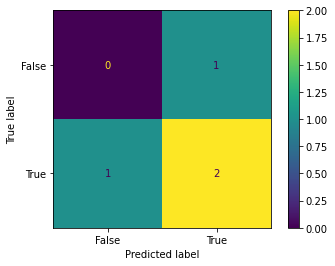

In [27]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = [False,True])
cm_display.plot()
plt.show()

In [28]:
ypred_prob = clf.predict_proba(xtest)[::,1]
fpr,tpr,_=metrics.roc_curve(ytest,ypred_prob)

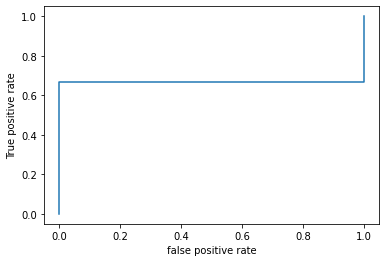

In [29]:
plt.plot(fpr,tpr)
plt.ylabel('True positive rate')
plt.xlabel('false positive rate')
plt.show()

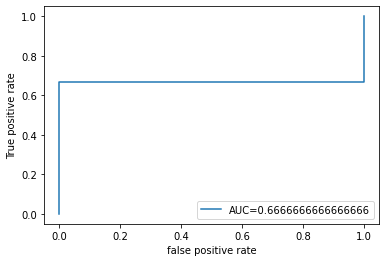

In [31]:
auc = metrics.roc_auc_score(ytest,ypred_prob)
plt.plot(fpr,tpr,label= 'AUC='+str(auc))
plt.ylabel('True positive rate')
plt.xlabel('false positive rate')
plt.legend(loc=4)
plt.show()